# Part 1 
# Stock Price Prediction Challenge

## 1 Exploratory Data Analysis (EDA)

In [24]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns    

In [25]:
df = pd.read_csv('question4-stock-data.csv')
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [26]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date',inplace=True)

missing_values = df.isnull().sum()
print('Missing Values in Each Column:\n',missing_values)

Missing Values in Each Column:
 Date         110
Adj Close     93
Close        117
High          95
Low          127
Open         103
Volume       145
dtype: int64


In [28]:
# Handle missing values using forward fill
df.ffill(inplace=True)

In [29]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,11291,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,2002-10-22 06:53:58.756531584,63.585441,72.058502,72.480062,71.645650,67.956843,2.147261e+05
min,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,1991-06-26 12:00:00,19.224636,27.548208,27.735613,27.548208,0.000000,1.351500e+04
50%,2002-10-16 00:00:00,50.583900,66.040001,66.650002,65.440002,66.000000,9.070000e+04
75%,2014-02-22 12:00:00,104.660000,114.295002,114.895000,113.589996,114.294998,2.922000e+05
max,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07
std,NaN,52.271656,51.296357,51.554292,50.977979,55.851555,3.874063e+05


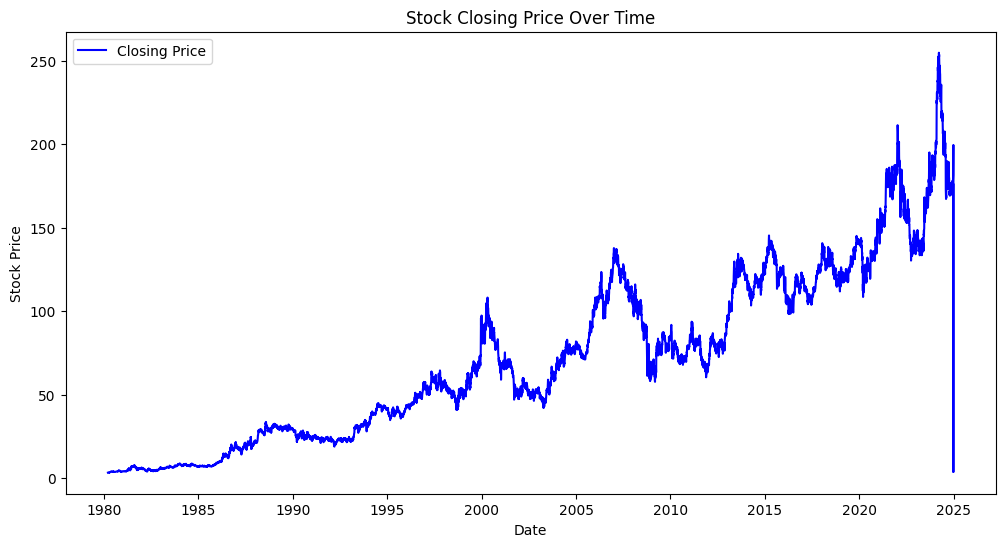

In [30]:
# Plot closing price trend
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()

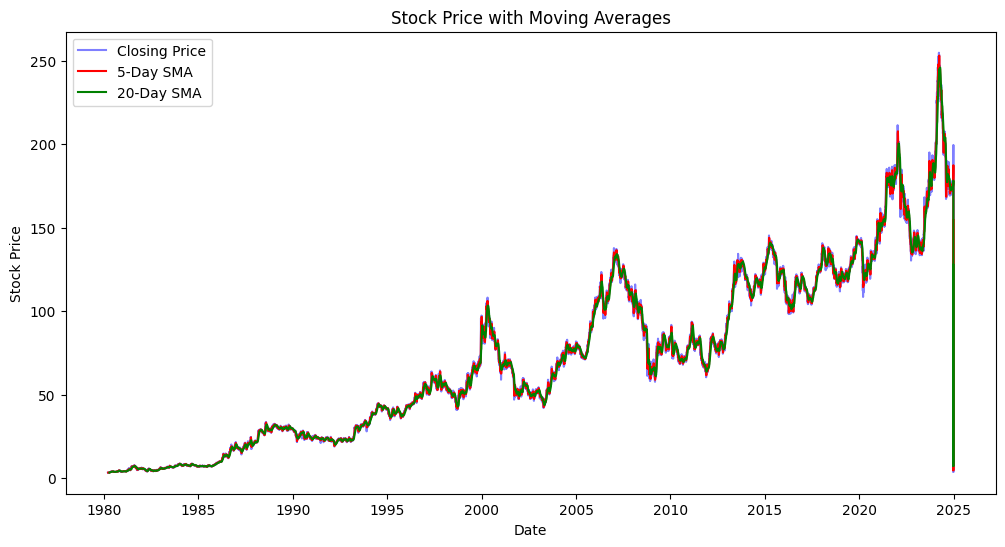

In [31]:
# Visualizing moving averages
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],label='Closing Price',color='blue',alpha=0.5)
plt.plot(df['Date'],df['SMA_5'],label='5-Day SMA',color='red')
plt.plot(df['Date'],df['SMA_20'],label='20-Day SMA',color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

##  2 Feature Engineering

In [32]:
# Feature Engineering - Creating lag features
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_5'] = df['Close'].shift(5)
df['Close_Lag_10'] = df['Close'].shift(10)

In [33]:
# Feature Engineering - Volatility (Standard Deviation of Closing Prices over 5 days)
df['Volatility_5'] = df['Close'].rolling(window=5).std()

# Feature Engineering - Price Momentum
df['Momentum_5'] = df['Close'] - df['Close'].shift(5)

# Target variable (Close price 5 days ahead)
df['Target'] = df['Close'].shift(-5)

# Drop NaN values from shifting
df.dropna(inplace=True)

# Display dataset after feature engineering
print(df.head(10))


         Date  Adj Close     Close      High       Low      Open   Volume  \
19 1980-04-14   2.352816  3.371501  3.371501  3.371501  3.371501      0.0   
20 1980-04-15   2.427510  3.478533  3.532049  3.371501  0.000000   1869.0   
21 1980-04-16   2.427510  3.478533  3.532049  3.478533  0.000000  61664.0   
22 1980-04-17   2.427510  3.478533  3.478533  3.478533  3.478533      0.0   
23 1980-04-18   2.390163  3.425017  3.478533  3.425017  0.000000   1869.0   
24 1980-04-21   2.390163  3.425017  3.478533  3.425017  0.000000   5606.0   
25 1980-04-22   2.390163  3.425017  3.425017  3.425017  3.425017      0.0   
26 1980-04-23   2.436846  3.491912  3.545428  3.491912  0.000000  24292.0   
27 1980-04-24   2.455519  3.518670  3.572186  3.518670  0.000000    934.0   
28 1980-04-25   2.474192  3.545428  3.598944  3.545428  0.000000   9343.0   

       SMA_5    SMA_20  Close_Lag_1  Close_Lag_5  Close_Lag_10  Volatility_5  \
19  3.342067  3.319323     3.371501     3.237711      3.317985      0.06

📌 Lag Features (Previous stock prices to help predict future values)

Close_Lag_1 → Closing price 1 day ago

Close_Lag_5 → Closing price 5 days ago

Close_Lag_10 → Closing price 10 days ago

📌 Volatility Indicator

Volatility_5 → Measures price fluctuations over the past 5 days

📌 Momentum Indicator

Momentum_5 → Difference between today’s price and the price 5 days ago

## 3 Model Training

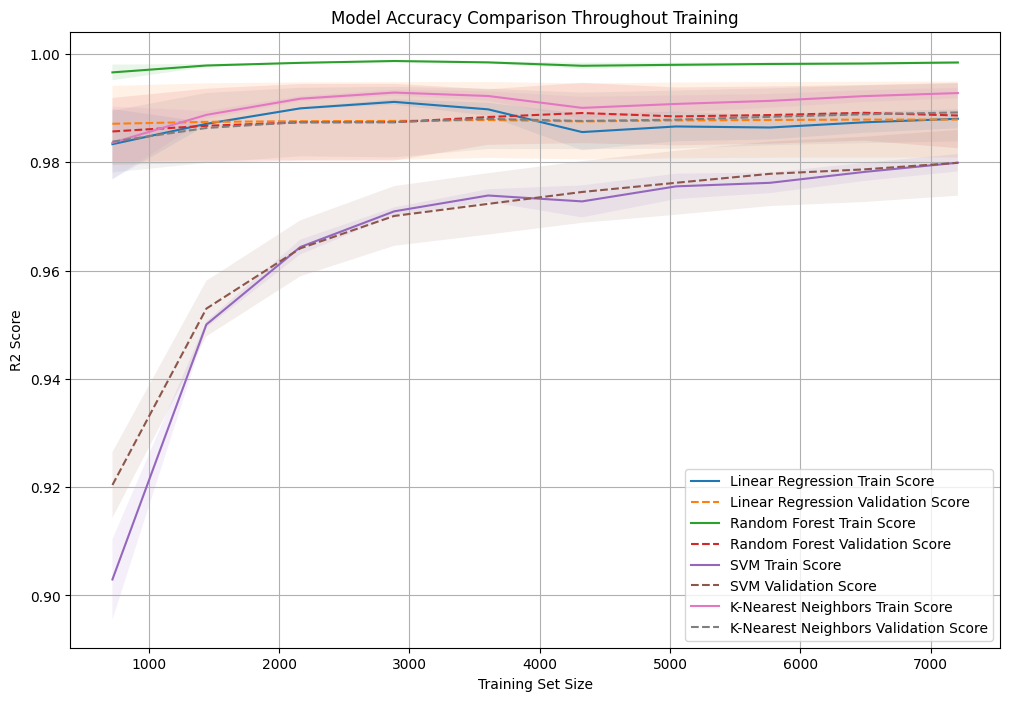

Linear Regression: 0.9879
Random Forest: 0.9886
SVM: 0.9799
K-Nearest Neighbors: 0.9892

Best Model: KNeighborsRegressor with score 0.9892
KNeighborsRegressor()


In [34]:
# Define features and target
features = ['Close','SMA_5','SMA_20', 'Close_Lag_1','Close_Lag_5', 'Close_Lag_10','Volatility_5', 'Momentum_5','High','Low','Open','Volume']
x = df[features]
y = df['Target']

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Normalize the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

scoring = 'r2'  # Use R2 score for evaluation

plt.figure(figsize=(12, 8))

# Loop through each model and plot learning curves
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train_scaled, y_train, cv=5, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label=f'{name} Train Score')
    plt.plot(train_sizes, test_mean, linestyle='dashed', label=f'{name} Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title('Model Accuracy Comparison Throughout Training')
plt.xlabel('Training Set Size')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

best_model, best_score = None, float("-inf")


def best_fitting_model(X, y):
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(),
        "SVM": SVR(),
        "K-Nearest Neighbors": KNeighborsRegressor()
    }
   
    scoring = "r2"

    best_model, best_score = None, float("-inf")
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
        mean_score = np.mean(scores)
        print(f"{name}: {mean_score:.4f}")

        if mean_score > best_score:
            best_model, best_score = model, mean_score

    print(f"\nBest Model: {best_model.__class__.__name__} with score {best_score:.4f}")
    return best_model, best_score


best_model, best_score = best_fitting_model(x_train_scaled, y_train)

print(best_model)


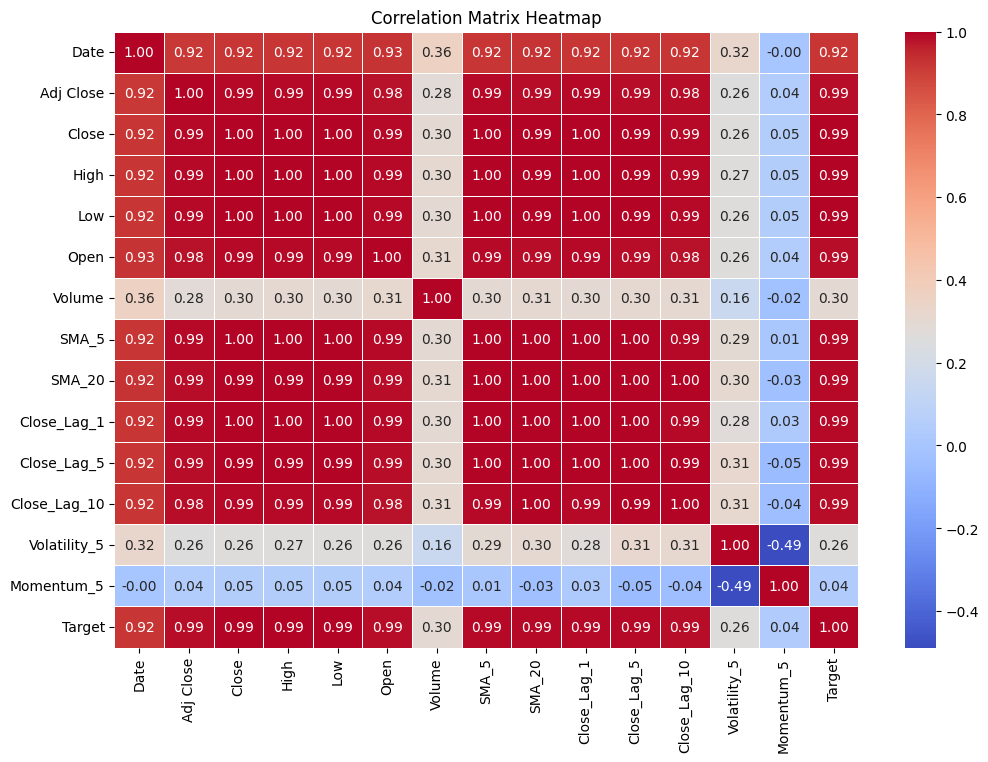

Correlation with Target Variable:
 Target          1.000000
Low             0.994567
Close           0.994563
High            0.994526
SMA_5           0.993725
Close_Lag_1     0.993668
Close_Lag_5     0.990380
SMA_20          0.989907
Close_Lag_10    0.986223
Open            0.986166
Adj Close       0.986078
Date            0.921482
Volume          0.299889
Volatility_5    0.264104
Momentum_5      0.039198
Name: Target, dtype: float64

Highly Correlated Features:
     level_0       level_1         0
1      Date     Adj Close  0.915533
2      Date         Close  0.921503
3      Date          High  0.921625
4      Date           Low  0.921289
5      Date          Open  0.926081
..      ...           ...       ...
141  Target         SMA_5  0.993725
142  Target        SMA_20  0.989907
143  Target   Close_Lag_1  0.993668
144  Target   Close_Lag_5  0.990380
145  Target  Close_Lag_10  0.986223

[132 rows x 3 columns]


In [35]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display correlations with the target variable (Target)
target_correlations = correlation_matrix['Target'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", target_correlations)

# Identify highly correlated features (multicollinearity)
high_corr_features = correlation_matrix[abs(correlation_matrix) > 0.8].stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] != high_corr_features['level_1']]  # Remove self-correlations
print("\nHighly Correlated Features:\n", high_corr_features)

In [36]:
# Random Forest suitable
best_model.fit(x_train_scaled,y_train)

# Prediction
y_pred = best_model.predict(x_test_scaled)

## 4 Evaluate the model

In [37]:

# Evaluate XGBoost on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print final model performance
print("\nFinal Model Performance\n")
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Save test results for documentation
Test_results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
Test_results_df.to_csv("Test_results.csv", index=False)


Final Model Performance

RMSE: 3.4147878464047645
MAE: 1.7928729851183673
R2 Score: 0.9955236784278279


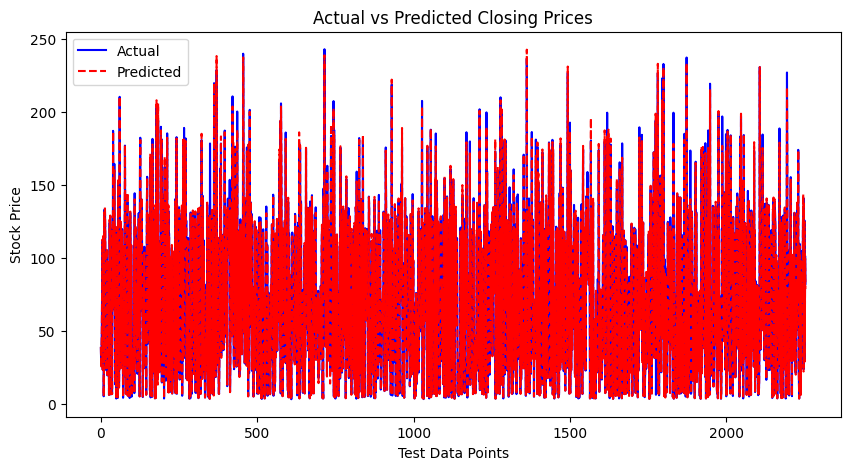

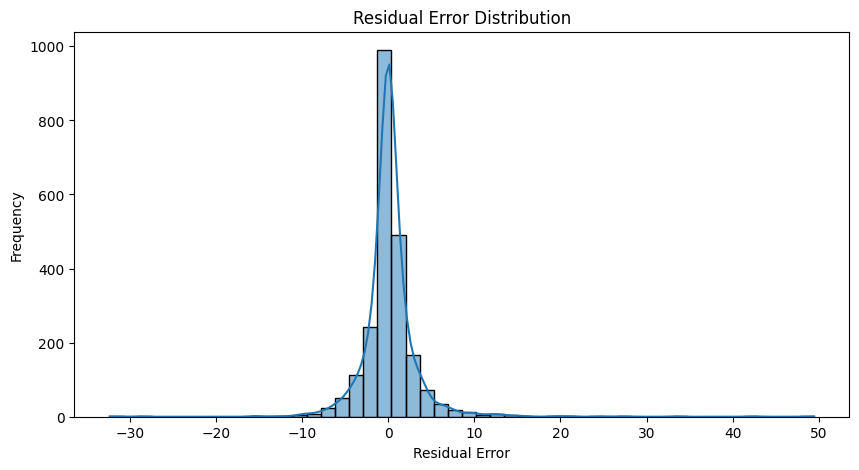

In [38]:
# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual',color='blue')
plt.plot(y_pred, label='Predicted',color='red',linestyle='dashed')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred 
plt.figure(figsize=(10,5))
sns.histplot(residuals,bins=50,kde=True)
plt.xlabel('Residual Error')
plt.ylabel('Frequency')
plt.title('Residual Error Distribution')
plt.show()

Permutation Importance:
          Feature  Importance
10          Open    0.052026
0          Close    0.046473
9            Low    0.044704
8           High    0.042811
5   Close_Lag_10    0.038402
4    Close_Lag_5    0.038191
1          SMA_5    0.038172
2         SMA_20    0.036281
3    Close_Lag_1    0.036156
6   Volatility_5    0.000526
11        Volume    0.000508
7     Momentum_5    0.000302


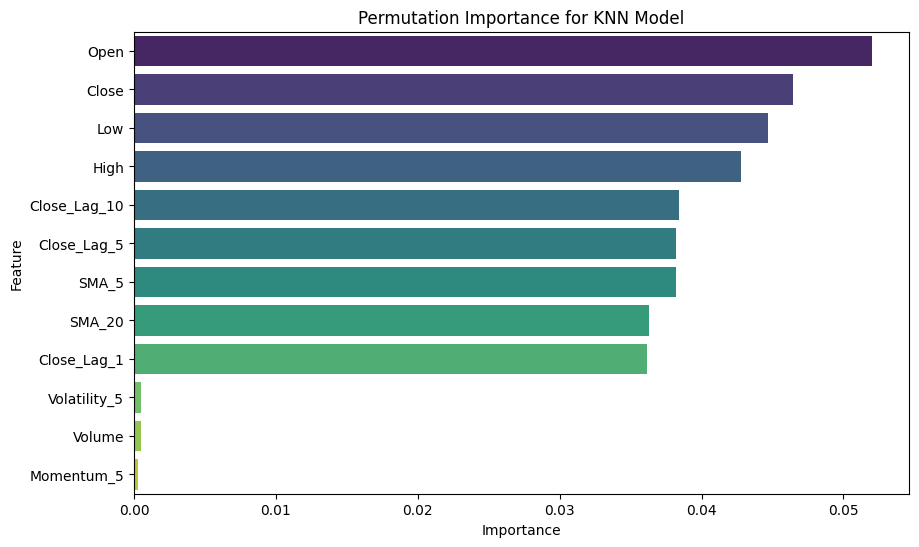

In [39]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(best_model, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance:\n", importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Permutation Importance for KNN Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
import joblib

# Save the model
joblib.dump(best_model, 'test_model.joblib')

print("Model saved successfully as test_model.joblib")

Model saved successfully as test_model.joblib


In [41]:
# Load the model
loaded_model = joblib.load('test_model.joblib')

In [42]:
path = input("give the path of the file containing atleast last 10 days data : ")

df = pd.read_csv(path)

df.drop(columns=['Unnamed: 0'],inplace=True)

df.ffill(inplace=True)

df['Volatility_5'] = df['Close'].rolling(window=5).std()

df['Momentum_5'] = df['Close'] - df['Close'].shift(5)

df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_5'] = df['Close'].shift(5)
df['Close_Lag_10'] = df['Close'].shift(10)

df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

In [43]:
features = ['Close','SMA_5','SMA_20', 'Close_Lag_1','Close_Lag_5', 'Close_Lag_10','Volatility_5', 'Momentum_5','High','Low','Open','Volume']
x = df[features]
x_test_scaled = scaler.transform(x)
y_pred = best_model.predict(x_test_scaled[-6: -1])

In [44]:
print("prediction for next 5 days :")
print(f"day 1 : {y_pred[0]}")
print(f"day 2 : {y_pred[1]}")
print(f"day 3 : {y_pred[2]}")
print(f"day 4 : {y_pred[3]}")
print(f"day 5 : {y_pred[4]}")

prediction for next 5 days :
day 1 : 178.22200012000002
day 2 : 143.5361605576
day 3 : 143.3719240984
day 4 : 108.79184926980001
day 5 : 120.03242835440001
